# This notebook ostensibly figures out what the sun position looks like
also thank you monarch SunEarthTools https://www.sunearthtools.com/dp/tools/pos_sun.php#top

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import astropy.units as unit
import astropy.constants as const
import itertools
import plotly.express as px 
import pandas as pd
from scipy.optimize import curve_fit


from axion_functions import *


In [53]:
solar_df = pd.read_excel("..\\sun_path_v1.xlsx", header=3)
hour = solar_df["hour"]
alt = solar_df["Elevation"]
az = solar_df["Azimuth"]
alt_rad = alt*np.pi/180
az_rad = az*np.pi/180
solar_df

,hour,Elevation,Azimuth
0,08:41:24,-0.833,62.44
1,08:50:00,0.680,61.15
2,08:55:00,1.550,60.39
3,09:00:00,2.410,59.62
4,09:05:00,3.270,58.84
...,...,...,...
112,18:05:00,3.080,300.92
113,18:10:00,2.220,300.15
114,18:15:00,1.360,299.38
115,18:20:00,0.480,298.61


In [55]:
az_rad

0      1.089784
1      1.067269
2      1.054004
3      1.040565
4      1.026952
         ...   
112    5.252045
113    5.238606
114    5.225167
115    5.211728
116    5.192180
Name: Azimuth, Length: 117, dtype: float64

In [59]:
def unstack_angle(arr, rad = True):
    if rad:
        boundary = 2*np.pi
    else:
        boundary = 360
    output = []
    for elem in arr:
        if elem>boundary/2:
            output.append(elem-boundary)
        else:
            output.append(elem)
    return np.array(output)

us_az_rad = unstack_angle(az_rad)
us_alt_rad = unstack_angle(alt_rad)

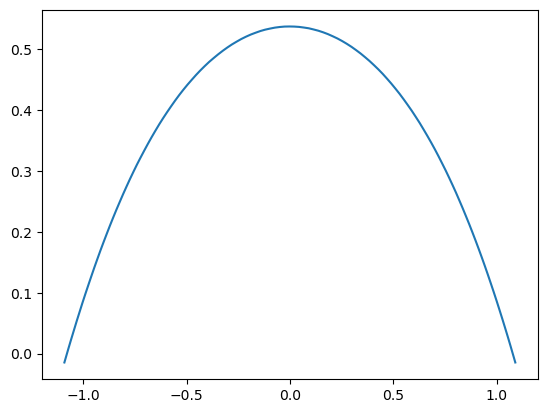

In [61]:
plt.plot(us_az_rad, us_alt_rad)

In [62]:
def cosine_fit(x, amp, phase, vert):
    return amp*np.cos(x-phase)+vert

In [63]:
param, cov = curve_fit(cosine_fit, us_az_rad, us_alt_rad)
param

array([ 9.94078999e-01, -3.90320878e-04, -4.40741946e-01])

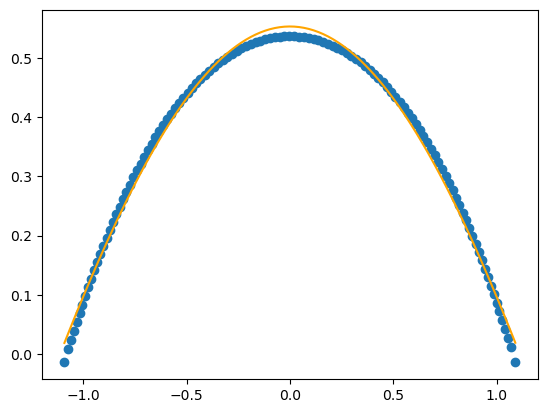

In [64]:
fig,ax = plt.subplots()
ax.scatter(us_az_rad, us_alt_rad)
ax.plot(us_az_rad, cosine_fit(us_az_rad, *param), color="orange")

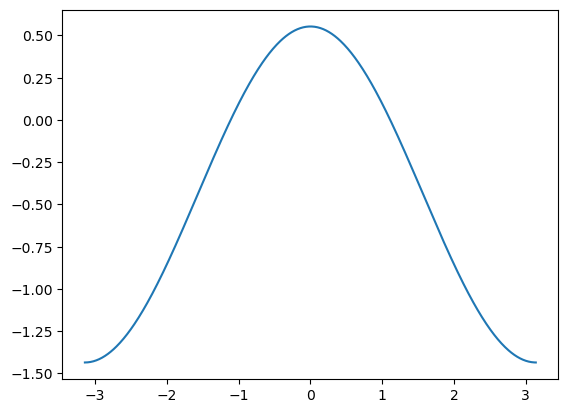

In [65]:
x_axis = np.arange(-np.pi, np.pi, 0.01)
y_axis = cosine_fit(x_axis, *param)
plt.plot(x_axis, y_axis)